<a href="https://colab.research.google.com/github/Jhoncandela/DiplomadoGADIA/blob/main/Implementaci%C3%B3n_del_Modelo_de_Inteligencia_Artificial_(IA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DIPLOMADO EN GOBIERMO Y ANALITICA DE DATOS PARA LA TOMA DE DESICIONES BASADOS EN INTELIGENCIA ARTIFICIAL

FUNDACIÓN UNIVERSITARIA CAFAM

DOCENTE NICOLAS MOJICA GOMEZ

ESTUDIANTES:
JHON ALEXANDER CANDELA NEZ, JAIME ARMANDO PINEDA Y CARINA




In [2]:
# manejo de datos estructurados
import pandas as pd

# cálculos matemáticos y matrices
import numpy as np

# Algoritmo K-means
from sklearn.cluster import KMeans

# Para normalizar datos
from sklearn.preprocessing import StandardScaler

# gráficos y visualizar datos
import matplotlib.pyplot as plt

# crear gráficos avanzados
import seaborn as sns


In [6]:
# Cargar datos
archivo = '/content/sample_data/Libro1.xlsx'
ventas = pd.read_excel(archivo, sheet_name='Sales_SalesOrderHeader')

# Seleccionar columnas relevantes
columnas_de_Uso = ['AccountNumber', 'TotalDue', 'OrderDate']
datos_ventas_filtrados = ventas[columnas_de_Uso].dropna()


In [8]:
# Convertir OrderDate a datetime
datos_ventas_filtrados['OrderDate'] = pd.to_datetime(datos_ventas_filtrados['OrderDate'])

# Calcular métricas por cliente
datos_cliente = datos_ventas_filtrados.groupby('AccountNumber').agg(
    TotalVentas=('TotalDue', 'sum'),
    Frecuencia_de_pedido=('OrderDate', 'count')
).reset_index()

# Revisar las primeras filas
print(datos_cliente.head(10))


    AccountNumber  TotalVentas  Frecuencia_de_pedido
0  10-4020-000001     95924.02                     4
1  10-4020-000002     28309.98                     8
2  10-4020-000003    407562.99                    12
3  10-4020-000004    660645.94                     8
4  10-4020-000005     97031.22                     8
5  10-4020-000006      3023.29                     4
6  10-4020-000007      8765.72                     4
7  10-4020-000008     25064.65                     4
8  10-4020-000009     14250.85                     7
9  10-4020-000010    500181.73                     8


In [9]:
escalar = StandardScaler()
datos_escalados = escalar.fit_transform(datos_cliente[['TotalVentas', 'Frecuencia_de_pedido']])


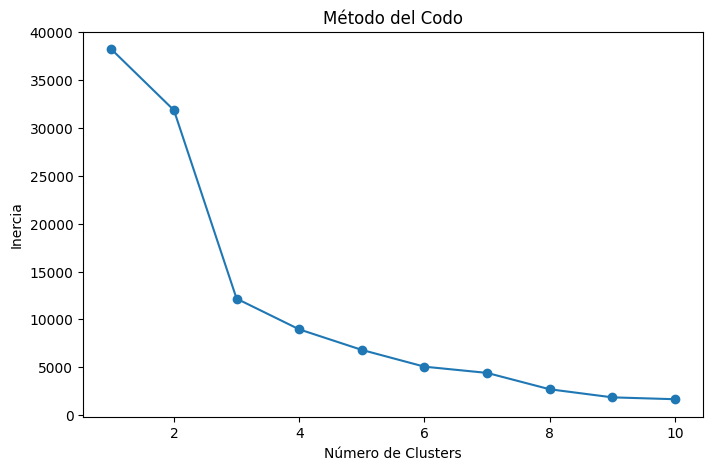

In [10]:
# Método del codo
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(datos_escalados)
    inertia.append(kmeans.inertia_)

# Graficar el codo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()


In [11]:
# Crear el modelo K-means
kmeans = KMeans(n_clusters=3, random_state=42)
datos_cliente['Cluster'] = kmeans.fit_predict(datos_escalados)

# Ver los primeros resultados
print(datos_cliente.head())



    AccountNumber  TotalVentas  Frecuencia_de_pedido  Cluster
0  10-4020-000001     95924.02                     4        0
1  10-4020-000002     28309.98                     8        1
2  10-4020-000003    407562.99                    12        2
3  10-4020-000004    660645.94                     8        2
4  10-4020-000005     97031.22                     8        1


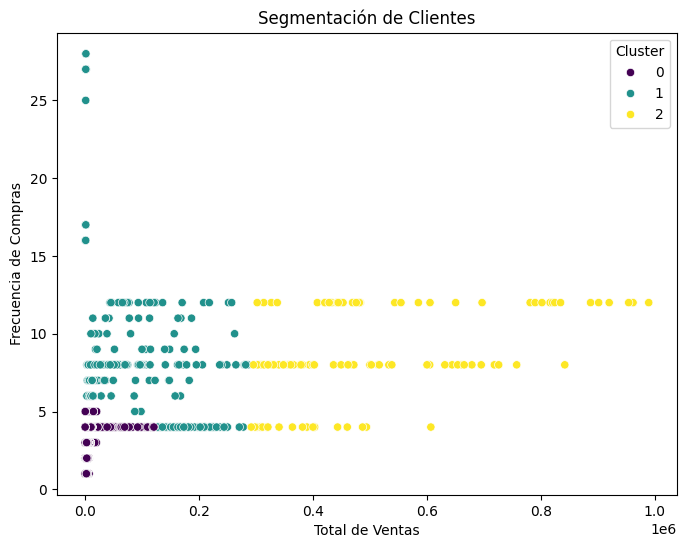

In [12]:
# Visualizar clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=datos_cliente['TotalVentas'],
    y=datos_cliente['Frecuencia_de_pedido'],
    hue=datos_cliente['Cluster'],
    palette='viridis'
)
plt.xlabel('Total de Ventas')
plt.ylabel('Frecuencia de Compras')
plt.title('Segmentación de Clientes')
plt.show()


In [13]:
# Actualizar cluster correspondientes
datos_cliente["Cluster"] = kmeans.labels_





In [14]:
datos_cliente

,AccountNumber,TotalVentas,Frecuencia_de_pedido,Cluster
0,10-4020-000001,95924.02,4,0
1,10-4020-000002,28309.98,8,1
2,10-4020-000003,407562.99,12,2
3,10-4020-000004,660645.94,8,2
4,10-4020-000005,97031.22,8,1
...,...,...,...,...
19114,10-4030-029479,2264.25,1,0
19115,10-4030-029480,2698.44,1,0
19116,10-4030-029481,3729.36,1,0
19117,10-4030-029482,2264.25,1,0
